# Inferential statistics II - Bootstrapping

## Introduction

In the previous exercises you performed frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold in your case, and what you want to do has a known theoretical distribution, for example the mean of a sampling distribution that we looked at.

In these exercises we are once again going to load in the medical charge data but this time we are going to make inferences about the population using bootstrapping, that is simulating repeated re-runs of an experiment. If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

Whilst these exercises do not strictly depend on these concepts, before working through them, you should have completed the preceding assignment and have a good understanding of such frequentist concepts as
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete these exercises, you should have covered the material on how to calculate bootstrap replicates of summary statistics. Having an appreciation of what confidence intervals and p-values are will be helpful.

In [6]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [7]:
med_charges = pd.read_csv('data/insurance2.csv')

In [8]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you would like to verify your calculations and check you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [13]:
np.random.seed(47)
N_rep = 10000

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicates = np.empty(N_rep)

for i in range(N_rep):
    bs_replicates[i] = bootstrap_replicate_1d(med_charges.charges, np.mean)

conf_int = np.percentile(bs_replicates, [5])

print("\nThe lower limit would be ", int(conf_int[0]))


The lower limit would be  12724.467921704


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember in the previous exercise set, we saw there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [5]:
# H0:std(insured)=std(non-insured)
# H1:std(insured)!=std(non-insured)

In [47]:
bs_std_ins_replicates = np.empty(10000)
bs_std_no_ins_replicates = np.empty(10000)
diff = np.empty(10000)

ins = med_charges[med_charges['insuranceclaim']==1]
no_ins = med_charges[med_charges['insuranceclaim']==0]

for i in range(10000):
    bs_std_ins_replicates[i] = bootstrap_replicate_1d(ins.charges, np.std)
    bs_std_no_ins_replicates[i] = bootstrap_replicate_1d(no_ins.charges, np.std)
    diff[i] = bs_std_ins_replicates[i] - bs_std_no_ins_replicates[i]
    
diff_conf_int = np.percentile(diff, [2.5, 97.5])

7570.415750240185
7477.030245107542
7596.034550240314
7284.26064855961
7173.21951557269
7782.312110618019
7965.771543276806
7076.717109260817
8065.787007359512
7814.298034620869
7566.083796481613
7818.860413000736
6796.2784290765285
7026.332263104638
7946.226178319588
7485.182896717054
7905.760803471554
6589.0800240515155
7454.019483529086
8494.520334746876
7656.406992223071
7969.948677180326
7829.84251151789
7929.366524802007
7704.205855127245
8008.259005739767
7954.6515366859685
7091.5617820865245
7645.652645727046
7005.401430721426
7883.025669569396
6685.649630396488
6838.820018482873
6583.984841463887
7059.252003773453
7438.811285227031
8329.089815145371
7568.758309488382
7732.327128511963
8617.10217360876
7620.885858198621
7802.787679074212
8170.180377908625
7223.688553350008
7721.72590454102
7302.537265680816
8191.4538138952485
7124.591897929744
7213.347683911579
7066.015780635878
8192.71849136876
7201.322592853732
7329.244049131413
7862.554002045681
8016.9798933944785
8021.43210

7700.904762185115
7302.952089973069
7268.5876837098685
7207.740416490789
7858.24549008078
6697.105394633249
8264.143695186984
7763.300391023664
7508.524577850767
7122.808531970097
7959.616244479749
7875.436293233602
6858.629692303722
7840.553127211046
8115.283807966112
7598.785064529969
8116.502190928336
7410.7252491648815
7612.126563704204
8281.216958178788
7127.950058354443
7681.54447776672
8170.063025619561
7643.717993803986
7703.620213659116
6965.298618143889
7880.122530079978
7744.6606694514785
7553.7705829038905
7681.2045321438
7702.673823935181
7335.916592328955
7313.0293805082265
7888.896186010647
7309.32995917529
7733.631990806238
7661.719372999441
8401.121991664379
7556.042181160778
7445.062136860248
8105.7968589498005
7543.374659722097
7830.408632689553
7595.81616817913
7201.491997443772
8028.601768479911
8204.568906044122
7878.903444452921
7609.536761906633
7884.799573004203
6873.645166525604
7242.968273930223
7312.75280043508
7226.940496567686
7803.540140413611
7858.013020

7682.174824217101
8460.987603710786
6758.336663913152
7444.103346025882
8950.662130165692
7109.517668993796
7584.411429958794
7489.707655665101
7019.649787005087
7967.369398226776
6914.356720463181
6950.554698373666
8179.8848590422795
7423.247055988748
8300.87029726015
7683.406629410031
7631.231822658149
7467.226433586486
8075.5759101231915
8595.77044541854
7356.265055055691
8274.933700706231
7666.768740191259
8510.184900450326
7110.3129862620035
7902.059100586748
7344.515927589768
8723.061992291183
7172.7480488844685
7790.419506964515
7530.306397818061
7589.455572802194
8390.846492234112
7334.565098402771
7484.809228892848
7853.508143362752
7413.553755901427
7375.954104098022
6614.7429055765
7813.443387781728
8122.064814052156
8297.069994283582
7067.30590731958
7661.265312189238
8141.4227642136675
7772.736763957725
7957.597750204407
7427.770263818568
7457.922530930484
7962.472089765548
8467.382975285358
7711.430579527028
7505.602881551673
7740.492258785514
7874.095356859297
7603.91662

7129.771880292495
7861.128914895265
7786.851741564869
7087.214025562823
7887.161279052284
7193.624078466029
8244.324701955673
7587.665873153285
8210.686889986577
7354.206820158995
7656.812081421228
7196.086578762112
7630.814823118551
7589.946354612748
7737.860506357353
8435.858288936724
7687.733075146928
7370.954149994408
6881.532339808898
6439.7110926444275
7983.339471813299
7026.158359112025
7768.414138706233
6470.0389559203295
7665.1261283309
6953.868498528181
8274.54680546765
7749.447281289104
7368.353802758026
7784.261424839799
7331.477424747091
8002.617094420998
7677.356584966502
7692.332095480342
7626.21079372748
7183.332095607381
8193.532578379745
7045.458608178515
7538.63847619576
7552.83035608562
8193.755214789035
7402.523531202934
6519.00943594956
7569.869676282441
7823.38377126144
8094.823513697555
7106.955408950514
7382.585834952959
7911.747410497004
7879.374600191072
7236.96495171635
8503.563886339663
7260.091215221532
7627.623149765534
8108.750773951019
7730.410487998147

7341.048281610435
7497.745016026277
7962.893438594908
7108.450369826539
7098.505196490919
7924.219729981721
7855.747840472319
7251.816932958719
8103.029473899182
7971.569152038983
7939.290912466223
8170.246761782877
7100.815107097063
8301.029312835746
8138.998442609563
8277.067037864632
6636.078398890724
7732.123041716299
8057.459671496883
7390.112599470294
7616.631697580164
8187.796627818257
7724.2171571428
7875.889261930538
7248.494013676589
6911.519965307695
7399.674075480264
7135.890331581518
7482.7680979825545
7383.464601961968
7140.987047170553
7360.719752661097
7876.314068007684
7964.177452763971
6731.513062731866
7379.282041259151
6856.255584776965
7380.6353990443395
7025.84792902167
7366.246713548341
7589.45407635864
7639.4786142663015
8022.788257713268
7457.698918803912
7812.914787057179
7618.300547775622
7060.088287283177
7132.896090913469
8070.3316303350575
7494.718189282124
7613.8699616227495
7700.894364582315
6864.19215192005
7797.014749435911
7491.841427102966
7293.15454

7524.161734958983
7672.334609158454
8671.002566099307
7518.396743275012
7135.045856929435
7217.119433072819
7755.830875929989
7247.926981092693
8278.160024876473
7178.950123429918
8214.39138527475
7648.906990508859
7786.942711851299
7768.9977648254935
7913.481841506644
8044.283424798002
7589.064758622398
6911.514674884373
7496.811904927553
7572.825763089517
8329.02114990184
7756.50695018944
7507.99675507099
7937.808842591703
7571.600367912472
7628.814178677918
8153.4468685997335
7803.489350003456
7551.2600146501945
8020.239962194955
7341.841806157572
7382.020540528999
7706.665603104119
7672.544505069594
7470.023858179072
7667.249599078914
6778.2813018337265
7525.672947076636
7615.574897500408
7806.299187269621
7465.111962724462
7430.250640620112
8144.078599207826
7154.9270362007455
7378.395480839397
6884.5529950566215
7650.882038820731
7862.850207438757
7637.651218301188
7447.588010306785
7401.220795041922
7419.113499726122
8152.143074343977
7347.894996059652
7427.225349112592
6556.576

6994.320694223907
7643.175253630859
8380.676535553735
7565.10885675795
7953.954182303794
6474.647818090741
7557.848728779237
7506.977077409496
8391.816612087598
8607.896721383373
7400.662731477097
7597.501897268869
7627.62762830416
7540.302274711206
7053.0686801566
7560.648558694331
7322.253362549553
7414.898421473412
6641.0107103760665
7210.069459045703
7690.056940136367
8437.609598071647
6942.501230852236
7851.83371724632
7820.528784652983
7112.411110327562
8031.922288497599
7821.985362704093
6361.505143529868
8526.804104265735
7121.772034476721
7306.280795839029
7733.53484567459
7271.618016767403
7552.045616545116
7721.908385581366
6822.746717128643
7288.419117470686
7579.078143387299
7581.5379601143
7839.557640436532
7192.21462112364
7684.291608431602
6301.380708016267
7536.677321517336
7610.181787821497
7764.263393104701
7536.641261232859
6921.604161043006
7053.230399705302
7139.808227549041
7415.3514463044185
8042.793451954367
7333.321279133518
7208.157117862897
7670.941705055381

8288.300964157448
7856.065267714846
7485.001732257532
7364.153018511619
7156.348283389004
8138.163843790726
7732.007027589455
7338.966232954402
7082.413718203861
7416.507681608904
7112.008200892962
7851.304740143994
6567.222746537432
7405.057252309322
6666.670079076946
7471.247605196352
7584.075508372254
6980.6489585040335
8060.862013971386
7115.877652879217
8212.879887290834
7114.611994791617
7813.2655798425185
6955.938962651273
7644.505448926027
7112.377169723001
7203.293863055131
7929.695394054458
7930.2778625692945
8190.929479576877
7381.19847932982
7664.127072282537
7573.62858517101
6992.327797032265
7347.361434843191
7251.934701045328
7492.326885958367
7584.837051579366
7037.294396367658
7427.720277676278
7773.73989369835
7417.324716554633
7143.942242119519
7752.2218812168685
7592.0464583351395
7809.037793267966
7819.925014420575
7545.616333404022
7795.327089378908
7794.972897926237
7605.187105474999
7432.5137580301725
7478.0786524399155
7201.703875505491
8335.26751649475
7513.52

7943.856146533445
7389.773665798584
7412.985450202915
7555.787895900476
7029.835298798813
8252.21105387521
8192.99480407688
7602.144084263191
8180.5067190794
6355.364475115232
7591.220759496282
7624.797238331662
8017.8514783621185
7416.528442474955
7431.517641848135
8070.505003838912
7177.902555920887
8508.144369701156
7149.316462183394
8580.759104619283
7864.162573198984
6859.687172893716
7474.779855561773
7779.80620795085
7496.263735409904
7177.662030802038
7004.569327288746
7874.406774240418
7038.219197050196
7660.439315207384
6722.544628430444
7586.308430773985
7615.557890781094
8160.7943108556165
7188.69066733181
7248.580808706733
7361.282913828818
7007.084018819716
7501.951273328591
7331.66256746587
7380.6184353777235
7739.748999858093
7345.284842839643
7811.574703908155
7625.107847434692
7447.339562436549
7857.5328946216505
7355.571359837857
7753.2450964077325
8790.283261174127
7390.716357779076
6881.3757723875815
7572.385675936353
7019.055620972333
8173.623484689916
7057.931697

7798.025247014614
8079.919160448767
7667.702316218949
7936.359714260766
7909.540440309831
8253.33710903602
7579.151606099725
7886.862682115909
7534.913108764549
7013.194385435471
7410.8143190502215
8250.938647534045
7707.382367282206
7502.247097825207
7248.452160561646
7401.9049616055445
7689.0381814622215
7967.635232170075
6639.357701198646
7595.174285453932
7812.270260618701
8258.812804115238
7978.115013285587
7359.767261529663
7758.273842946806
7762.489597260805
6729.473407056741
8255.815553859788
7407.926378303672
7900.3882183309615
6906.159072312396
7649.334740161238
7713.282168330759
7270.445636114292
7724.985435172585
7560.988462937735
7026.746516363236
7682.374502115756
6953.166656672847
7316.930428329374
8150.953600814784
7494.065191187602
7018.968912950268
7434.3622762244
7151.175740637121
7971.622874869578
7018.753018841731
7787.271537016078
7528.618744115327
7861.051348885925
6497.382889631236
7822.703429763057
8058.536426219811
6973.196320564918
7446.917056544828
7930.7341

6188.456115340214
7490.003650969658
7710.751342224773
7599.302757460792
8130.30080127921
7647.537425739469
6264.991434696565
7772.699246252274
7495.12849058258
6746.571841664574
7349.606498838636
7320.0359495487
8473.214618014134
8221.656865029407
7340.015131528895
7908.68916100425
7910.491983572603
7157.303428336449
7789.156056305603
6892.927187355331
6969.84881567067
8282.507946968306
6846.531759766515
6916.641863865952
7089.364215189998
8171.31518847852
8057.401674353453
6935.759500548951
7299.181033696979
7473.090140608832
7955.984920414108
7160.779643754171
8206.306105744781
7935.885417284638
7514.53932523001
7606.312924438487
7658.227184601202
6938.868103403475
6829.9283956022255
8754.279372115685
7077.438302095453
8233.304787301175
7124.371011989663
7453.071118071325
7911.701845461024
7360.34478894333
7067.489602198394
7895.870947015037
7952.918398485678
7865.71239335245
7171.3743790168555
6999.959594154649
7119.35410936857
7746.9835853280365
7912.1768720931395
7842.440063960376

7527.612917219438
6635.344731853146
7866.6390479808615
7529.253566978995
8012.677268339275
7391.915963900322
7830.624220319126
8209.037617164915
7933.578893660481
6391.5221501276355
7107.70013540297
7234.550120614692
7189.806386248414
6698.053068085705
7849.717407309302
8497.529273439366
7981.9130605965875
7796.281973048587
7603.664258559162
7684.954082912306
8619.12831419093
7276.368373610337
6995.604728607837
7660.786991146448
7581.5133634791055
8529.298043702804
7124.24045265442
7590.3418560192995
7504.397615036739
7567.205755658317
7453.730389062612
6985.2356450548405
8027.132358404074
6317.238776535044
7301.381154177203
7557.379089161165
7673.617398384984
7350.897518104955
7283.190288336573
7436.093699807966
7808.4481354694835
8239.037770054496
8169.581606986328
8395.228598534159
8476.443461960163
7840.024175758322
7446.759822185949
7843.700764495933
7182.614755751286
7270.546093419696
6396.84140309937
7435.429057019205
7625.940853451894
7366.862638980921
7929.861734156483
7344.11

7425.676627669295
6964.270740401771
7466.2947450016745
7331.178622191615
7377.048352867729
7382.300102925084
7293.414835848453
8324.202227471986
6574.237467286368
7473.996768495134
7301.691425287021
8105.267722814967
7485.679331878274
6835.706008991263
7559.756130339825
7281.410868692872
7372.720718512993
7128.834887235504
7231.561238475682
7571.269746330951
7623.743106562536
7807.410683143546
7680.205522043024
6882.894493531584
6891.223635860436
7427.5087677944175
7746.338629465654
7520.512544346125
7487.364045326821
7761.036614923858
6545.333196044692
8346.633400139905
7172.597659602593
7090.191150097466
7565.555247826714
6426.434289482362
8358.928401773544
7467.980816176448
7446.120418965593
7458.762281570285
7598.6672819114765
6549.14252098499
7192.450338961048
8004.265601589282
7564.591846608101
7716.398674768226
8084.05929285357
7513.601675903122
8111.218646830225
7662.86641896006
7366.477820630289
7828.9264634310475
7801.663592597115
7806.124469971312
6957.932276822324
7889.2983

7841.056857808009
7540.6133246164745
7796.716905556675
7681.842310641743
6957.011420054173
8357.483429898792
7296.914221879471
7260.056565154591
7783.069420299832
7820.148566515968
6983.102441534995
7859.416286928232
7628.5144200268915
7635.296401094124
6587.054969628281
7266.76480228354
7798.920538063807
7080.31281387624
7277.320432751571
7544.816151883476
6939.285815338435
6995.423763566361
7595.361916935574
7902.384309248725
7361.247487692648
7888.977558077355
7556.359991070309
8015.785591618606
6917.890493934268
7577.913004598596
8319.115046413712
7394.258494056171
7247.326125617209
6783.925205361657
6897.048210693624
7468.170545640239
7784.919046036676
6934.29287254581
7709.202313435195
7695.954070303939
7335.8065649884575
7837.974263034416
7859.195031635266
7672.779342127749
7207.806307525383
7405.20708362994
6966.107506905185
8028.227084904856
7538.827083054222
7971.944937251509
7544.27408685393
7245.346458067243
6636.88747383022
7984.20208443424
7921.443964362838
8585.783501881

7598.8471937038485
8250.653501231747
6916.50298557144
6837.137871049944
8161.725217029131
7865.537836500424
7542.229318795537
7464.6626860399365
8001.508726737384
7637.100061804985
7200.021619012071
7704.067105798263
6905.581975599743
8391.420397015998
7060.02995094801
6790.075148188789
8005.930359369172
7246.285745836072
7664.930667232406
7580.017017577732
7939.699857777683
7077.558806924734
7972.460450248602
8141.265553002078
7412.564657730013
6790.819709413541
7762.846638374714
7478.445544851893
7546.573087346914
7749.477402892031
7190.862152671777
7036.953441909752
8122.514002904557
7440.83000038195
8450.634178915992
7496.841516326493
7316.576651677723
7326.838859539005
7478.00346513643
7358.688984311917
7952.671219137056
7212.102681233843
7170.516127469455
7323.887260912179
7267.501011644366
8271.837194876844
7331.782555491662
7609.395356984037
7692.762422956175
7575.728708123356
7436.508179578468
8073.375033685378
8825.10330857604
7248.605011446679
8220.067169929122
7388.86310446

7786.1270175239
7816.251868923596
7871.0912338244625
7691.260717987158
7713.25762962401
7265.4244984629995
7799.8502440863695
8214.772890058017
7297.1235401169415
7129.808197593177
6445.924492385838
7548.343209751337
7717.6045135086015
6952.664543347031
6608.856380755833
8461.031409520692
8370.301808490676
6911.752013956883
7480.576906921548
7551.233944464417
7928.689382807497
6774.496013647467
7076.666316001262
8339.28045094346
8123.311094619558
7278.636548069437
8280.172513040092
7760.1618321378155
7219.713913347047
8499.346739133372
7435.705762497227
8314.928738102397
7842.4664053802835
7373.824091194859
7707.978127269703
8442.029063130693
7258.958636118632
8126.856043256995
8399.936040989032
8099.70865337943
8446.745221373265
7852.1627222197285
8268.668687577592
7446.183597257244
7597.162835134746
6485.430159139982
7187.823409273191
6391.725137413165
7680.693182449078
7223.284721894304
7702.527679614114
7211.636256403741
8361.913413800119
6937.220256852578
7376.169658132642
8476.37

7987.494563568607
7787.50672567521
7787.202552660607
8348.67658178724
7693.634263377455
6927.028411119361
6866.54807887496
8091.496857755669
7233.392044916494
7928.96909937569
7588.309859354979
7165.1254253073585
7532.112771497873
7696.023255469647
7128.032429955298
8115.686795124628
8469.64847602847
7445.905998641115
7697.901043559841
7782.697945524545
7561.544809906343
7273.827072377315
7847.701527701567
7383.576839933294
7422.870349172835
7467.641258773271
6692.269701587734
7237.988878976815
7461.664555270571
7703.019266448311
6829.686369049052
7252.160455757388
8091.11553621154
6464.654287850326
7722.409388623736
7941.202588589534
7597.969697156266
7741.850619034434
8483.577017838503
7782.843801396057
7834.005703775088
7211.065342140175
7636.330602907821
8013.753552607817
7778.777373358235
6886.327920643858
7175.5060770625105
7659.868137626269
8126.296408673091
7244.463931501207
7837.742858575737
7158.88034838417
7732.117218486131
6930.092680775124
7554.59852200026
7922.70031266903

7817.305143326561
7521.685143230866
6933.227728388182
8105.018151049968
7794.380008426969
7330.444202206233
7258.72657860104
7557.748304686404
7029.855553776902
7256.173990097783
6608.245695316033
7035.440356846867
7023.4023940458965
7819.543288169609
7439.149055270207
7460.976095981249
7809.760772770635
7864.073355850333
7305.171278414264
8057.453511672178
8037.962603554925
7269.619170665393
7234.371946729949
7226.3231425232225
7721.145843095053
7388.363369275267
7255.565093237003
7865.843694573911
7243.546859709829
7331.640205543254
8468.385771816078
8796.22152512728
7686.77036481654
7985.956710725713
7661.44193500585
7740.679367426831
7921.529170419355
7606.452551606458
7363.921999410151
7578.929396076294
7996.928857877327
7807.265282175334
7831.9479928064075
7215.402763052926
6901.242929857329
7637.530700102878
6874.427220016634
7741.596967556628
6897.048519279547
7182.975990302102
6894.115432578771
7832.404074006282
8164.359379351647
7596.165877274473
7330.957736924413
7760.486274

7650.249852671166
7133.303263816931
9012.90462966616
7119.924213952929
6969.785717252352
6979.783295833411
7272.67490660003
7244.416986551252
6705.0631726272095
7725.407749394215
8070.5600506714545
7091.369391104926
7591.67207254985
7988.514877575463
8017.065489132833
8126.356514794172
7603.00633169886
7795.3530903715555
8336.296584298998
8656.281957006213
7199.476786164239
7503.142170208936
7960.639816513363
7109.2631227143565
7170.053791999849
7516.52930785229
7580.342304095169
8156.744895963575
7766.3152169156765
6901.505561750236
8299.602685139687
7474.727827649721
7454.129950740629
6751.904919833174
7837.332634284913
7041.576040961822
7062.213509689681
7629.77556885459
8772.032396958468
7676.850908642904
7701.340219105371
7612.749221181089
7904.462054287301
7599.895937149327
7725.681666124023
7365.3672649612245
7508.612290750259
8285.760043217277
7914.658155266295
6931.331741013183
8212.159227440316
7045.4104519451475
6634.637292453596
7116.376264185988
7860.485497540477
8217.5691

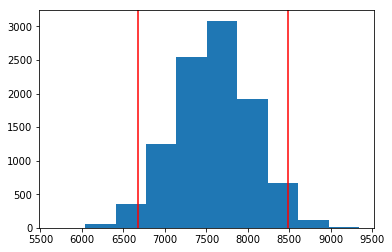

In [29]:
plt.hist(diff)
plt.axvline(x=diff_conf_int[0], color='red')
plt.axvline(x=diff_conf_int[1], color='red')
plt.show()

In [35]:
print("We would reject the null hypothesis because there is a very significant difference. The mean difference is ", 
      int(np.mean(diff)), ". Our 95% confidence interval is between", int(diff_conf_int[0]), "and", int(diff_conf_int[1]), 
      ", which does not include zero. ") 

We would reject the null hypothesis because there is a very significant difference. The mean difference is  7592 . Our 95% confidence interval is between 6676 and 8486 , which does not include zero. 


Population std insurance charges: 	 14036.956250260411
Population std no-insurance charges: 	 6440.699841605233
Population std difference: 		 7596.256408655178


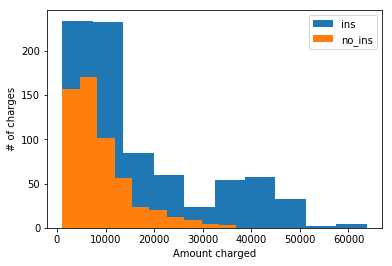

In [57]:
#sanity check
print("Population std insurance charges: \t", np.std(ins.charges))
print("Population std no-insurance charges: \t", np.std(no_ins.charges))
print("Population std difference: \t\t", np.std(ins.charges) - np.std(no_ins.charges))

plt.hist(ins.charges)
plt.hist(no_ins.charges)
plt.legend(["ins", "no_ins"])
plt.xlabel("Amount charged")
plt.ylabel("# of charges")
plt.show()

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type II error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this but using the bootstrap.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

In [ ]:
# H0:mean(insured_charges)=mean(non_insured_charges)
# H1:mean(insured_charges)!=mean(non_insured_charges)

In [74]:
bs_mean_ins_replicates = np.empty(10000)
bs_mean_no_ins_replicates = np.empty(10000)
diff_mean = np.empty(10000)

for i in range(10000):
    bs_mean_ins_replicates[i] = bootstrap_replicate_1d(ins.charges, np.mean)
    bs_mean_no_ins_replicates[i] = bootstrap_replicate_1d(no_ins.charges, np.mean)
    diff_mean[i] = bs_mean_ins_replicates[i] - bs_mean_no_ins_replicates[i]
    
pop_diff_mean = np.mean(ins.charges) - np.mean(no_ins.charges)
print(diff_mean)
    
p = np.sum(diff_mean >= pop_diff_mean) / len(diff_mean)

print("P-value: ", p)

[7657.23341775 8042.85891245 7865.46323936 ... 8132.09879319 8667.83369537
 6472.076713  ]
P-value:  0.5014


__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__

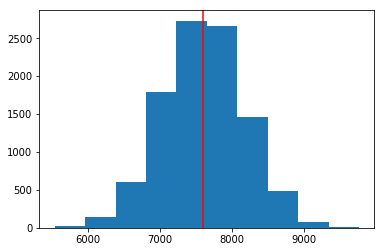

In [72]:
plt.hist(diff_mean)

plt.axvline(x=pop_diff_mean, color='red')


__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__

__Q:__ Remember the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ I would use equal_var=False because we can see that we have different variances.

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real world consequence of rejecting the null hypothesis?

__A:__
No, I would do a one-sided test because I would want to see if the new algorithm improves clickthrough rate only. 

H0: Clickrate A >= Clickrate B
Ha: Clickrate A < Clickrate B

Real-world consequences of rejecting the null hypothesis would be that the ad-recommender team could potentially release the new algorithm since it is more effective than the original. 

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.